# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected for this analysis contains information about 10,000 movies collected from The Movie Database(TMDb), including information like user ratings, budget, revenue, etc. For this analysis, we will explore variances in films quality (based on user reviews) and popularity over the years and its correlation with the investment/budget required.

> Main topics:
> 1. There is any correlation between budget and popularity? Have the average popularity increased or decreased over the years? What about the profits obtained?
> 2. What about the movies quality over the years? There is any correlation between investment/budget and quality?


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

> This section will be focused on assessing and cleaning the dataset for analysis.

### Data Assessment

> First, we will take a look at our dataset and make some modifications in order to improve the potential for analysis.

In [101]:
df.head() #Taking a first look to the dataset.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [102]:
df.shape #Looking at the amount of rows/columns

(10866, 21)

In [103]:
df.info() #Checking for data types and null values.
#Note that fields with missing values are not going to be relevant to our analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [104]:
#Dividing the amounts by one million, in order to work with smaller numbers, expressed in millions of dollars
df['revenue_adj'] = df['revenue_adj'] / 1000000 
df ['budget_adj'] = df ['budget_adj'] / 1000000

#Creating a column for profits adjusted for inflation (revenue - budget)
df['profits_adj'] = (df['revenue_adj'] - df ['budget_adj'])

In [105]:
df.duplicated().value_counts() #checking for duplicated values

False    10865
True         1
dtype: int64

In [106]:
#Creating a new column for release decade instead of only having release year.
def f(row):
    if row['release_year'] >= 1960 and row['release_year'] < 1970 :
        val = 1960
    elif row['release_year'] >= 1970 and row['release_year'] < 1980 :
        val = 1970
    elif row['release_year'] >= 1980 and row['release_year'] < 1990 :
        val = 1980
    elif row['release_year'] >= 1990 and row['release_year'] < 2000 :
        val = 1990
    elif row['release_year'] >= 2000 and row['release_year'] < 2010 :
        val = 2000
    elif row['release_year'] >= 2010 and row['release_year'] < 2020 :
        val = 2010
    else:
        val = 2020
    return val

    

In [107]:
df['decade'] = df.apply(f, axis=1)

In [108]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits_adj,decade
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,1254.445953,2010
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292,210.161353,2010
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199955,271.619025,170.419070,2010
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999919,1902.723130,1718.723211,2010
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799923,1385.748801,1210.948878,2010


### Data Cleaning

> Since in the previous step we covered pretty much the entire process of data wrangling, the cleaning process will be simple, just removing duplicates and make sure to keep only relevant information in our data frame.

In [109]:
df.drop_duplicates(inplace=True) #removing duplicates

In [110]:
#new dataframe keeping only relevant fields for analysis, in order to make it a little bit easier and quick 
#to read. Also, we will work only with values adjusted for inflation.
df_1 = df.drop(['id','imdb_id','budget','revenue','runtime','keywords','overview', 'cast', 'homepage', 'director', 'tagline', 'genres', 'production_companies', 'release_date'], axis=1)
df_1.head()

,popularity,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits_adj,decade
0,32.985763,Jurassic World,5562,6.5,2015,137.999939,1392.445893,1254.445953,2010
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,137.999939,348.161292,210.161353,2010
2,13.112507,Insurgent,2480,6.3,2015,101.199955,271.619025,170.419070,2010
3,11.173104,Star Wars: The Force Awakens,5292,7.5,2015,183.999919,1902.723130,1718.723211,2010
4,9.335014,Furious 7,2947,7.3,2015,174.799923,1385.748801,1210.948878,2010


In [111]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
profits_adj       10865 non-null float64
decade            10865 non-null int64
dtypes: float64(5), int64(3), object(1)
memory usage: 848.8+ KB


In [112]:
df_1.shape

(10865, 9)

<a id='eda'></a>
## Exploratory Data Analysis

> First we will take a look at the popularity levels over the years, and its correlation with the investment made. Also we will analyze if the movies business have become more profitable over the years.

> Then, we will focus on quality instead of popularity, based on the reviews from the users.


### 1. There is any correlation between budget and popularity? Have the average popularity increased or decreased over the years? What about the profits obtained?

In [113]:
df_1.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits_adj,decade
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,217.399632,5.975012,2001.321859,17.549894,51.369002,33.819108,1997.001381
std,1.000231,575.644627,0.935138,12.813260,34.307527,144.638333,125.219384,13.227730
min,0.000065,10.000000,1.500000,1960.000000,0.000000,0.000000,-413.912431,1960.000000
25%,0.207575,17.000000,5.400000,1995.000000,0.000000,0.000000,0.000000,1990.000000
50%,0.383831,38.000000,6.000000,2006.000000,0.000000,0.000000,0.000000,2000.000000
75%,0.713857,146.000000,6.600000,2011.000000,20.853251,33.701729,12.930908,2010.000000
max,32.985763,9767.000000,9.200000,2015.000000,425.000000,2827.123750,2750.136651,2010.000000


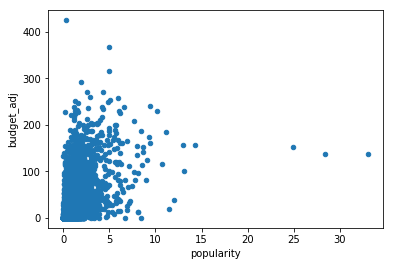

In [114]:
# Checking correlation between budget and popularity. 
# Noted that there are some outliers in the popularity column.
df_1.plot(x='popularity', y='budget_adj', kind='scatter');

In [115]:
#identifying those outliers
df_1.loc[df_1['popularity'] > 15]

,popularity,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits_adj,decade
0,32.985763,Jurassic World,5562,6.5,2015,137.999939,1392.445893,1254.445953,2010
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,137.999939,348.161292,210.161353,2010
629,24.949134,Interstellar,6498,8.0,2014,151.980023,572.690645,420.710622,2010


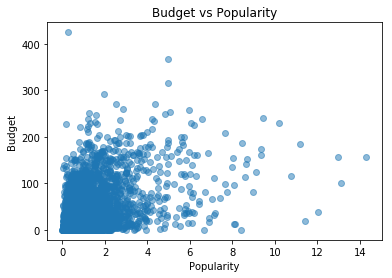

In [116]:
#creating a new dataset without them, and performing the same analysis.
#Now we can observe a positive correlation between budget and popularity.
df_2 = df_1.loc[df_1['popularity'] < 15]
plt.scatter(df_2['popularity'], df_2['budget_adj'], alpha=0.5)
plt.title('Budget vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Budget');

> It means that an increase in the budget would probably achieve more popularity

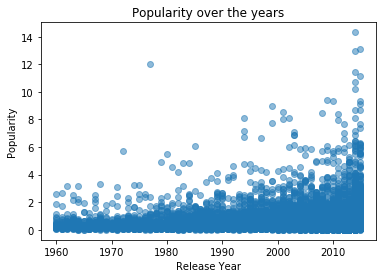

In [117]:
#Checking popularity over the years. We also note a positive correlation, but would be better to see it by decade.
plt.scatter(df_2['release_year'],df_2['popularity'], alpha=0.5)
plt.title('Popularity over the years')
plt.xlabel('Release Year')
plt.ylabel('Popularity');

In [118]:
#Analysis per decade
df_1.groupby('decade').popularity.mean()

decade
1960    0.424244
1970    0.484605
1980    0.524321
1990    0.620927
2000    0.631838
2010    0.754502
Name: popularity, dtype: float64

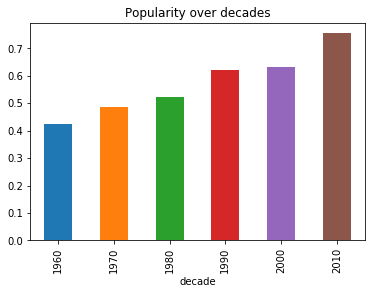

In [119]:
#We note that the average films popularity increased over the years, with a strong correlation.
df_1.groupby('decade').popularity.mean().plot(kind='bar', title='Popularity over decades');

> We can see that movies become more popular over time.

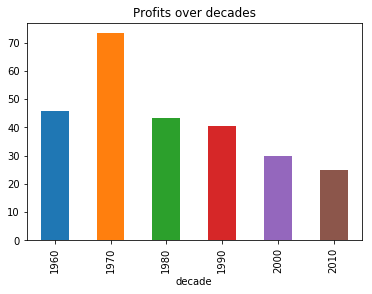

In [120]:
#It looks like the profits decreased over the decades, let's dive deeper.
df_1.groupby('decade').profits_adj.mean().plot(kind='bar', title='Profits over decades');

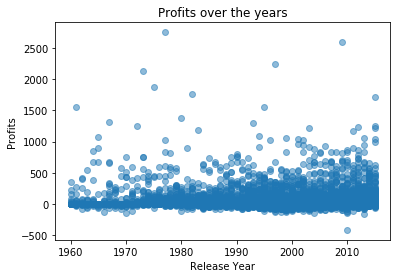

In [121]:
#Noted that there are outliers affecting the previous plot. We can observe a positive trend showing that the profits actually
#have increased over the years.
plt.scatter(df_1['release_year'],df_1['profits_adj'], alpha=0.5)
plt.title('Profits over the years')
plt.xlabel('Release Year')
plt.ylabel('Profits');

> We can see how the movies business become more profitable over time.

### 2.  What about the movies quality over the years? There is any correlation between investment/budget and quality?

In [122]:
df_1.head()

,popularity,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits_adj,decade
0,32.985763,Jurassic World,5562,6.5,2015,137.999939,1392.445893,1254.445953,2010
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,137.999939,348.161292,210.161353,2010
2,13.112507,Insurgent,2480,6.3,2015,101.199955,271.619025,170.419070,2010
3,11.173104,Star Wars: The Force Awakens,5292,7.5,2015,183.999919,1902.723130,1718.723211,2010
4,9.335014,Furious 7,2947,7.3,2015,174.799923,1385.748801,1210.948878,2010


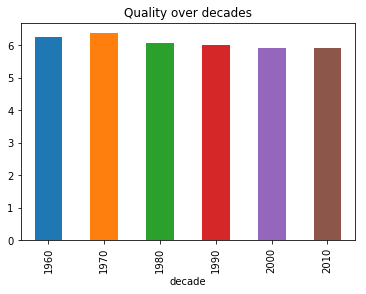

In [123]:
#Checking if there is any trend in the films quality
df_1.groupby('decade').vote_average.mean().plot(kind='bar', title='Quality over decades');

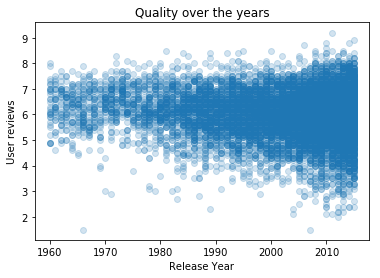

In [124]:
#Deeping dive over the years.
plt.scatter(df_1['release_year'],df_1['vote_average'], alpha=0.2)
plt.title('Quality over the years')
plt.xlabel('Release Year')
plt.ylabel('User reviews');

> Low quality movies have increased in a bigger proportion than the high quality ones. 

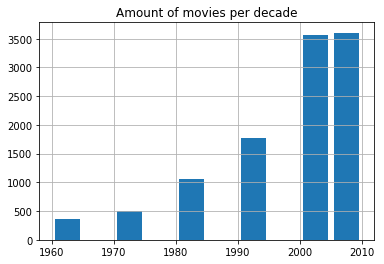

In [125]:
#Single variable analysis for release decade.
#Note that there are many more movies in our dataset in recent decades
df_1['decade'].hist(rwidth=0.8)
plt.title('Amount of movies per decade');

> We can observe that in recent years we have a larger amount of movies

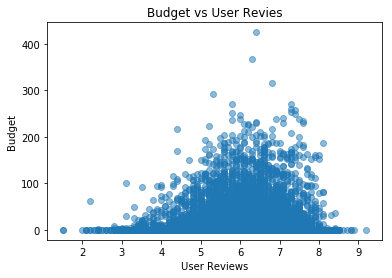

In [126]:
#Analyzing if any trend between budget and film quality. No correlation noted.
plt.scatter(df_1['vote_average'],df_1['budget_adj'], alpha=0.5)
plt.title('Budget vs User Revies')
plt.xlabel('User Reviews')
plt.ylabel('Budget');

> High quality movies are not defined by the budget or investment made.

<a id='conclusions'></a>
## Conclusions

> Topic 1: 
According to our research, the movies popularity has increased over the years. Therefore, makes sense that the movies have also become more profitable over time, noting a strong correlation between the revenue obtained and the released movies for each decade, making the movies business more profitable. Also there is a positive correlation between budget and popularity, even is not strong enough to make predictions about it, we can conclude that a larger investment offers bigger chances to achieve more popularity.

> Limitations: Our popularity analysis is based solely on the website ratio, this is useful for the research but in order to make a deeper analysis we would need more detailed information, such as ticket sales, social media trends, streaming data, etc. 

> Topic 2:
We noted that we have a larger amount of movies for the recent decades, therefore there are more options to choose, with higher and lower quality ratings in comparison with the past. Eventhough, we observed that probably in the initial decades in our coverage period, there was a higher quality standard by observing the relation between the average quality and movies release year, since in recent decades movies with lower quality ratings have been increased in a bigger proportion than high quality films. We cannot conclude that the movies quality has increased or decreased over time, since this would require a deeper analysis, probably breaking it down by film genre. Finally, we noted that there is no correlation between budget and quality, therefore a larger investment should not guarantee higher quality ratings.

> Limitations: The quality is quite subjective and is based on user reviews. Also there are movies with larger amount of votes, so their quality averages are more reliable. In order to dive deeper in this matter, we would need data such as nominations, awards, ratings from specialists, etc.

In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0